# Functions to export

In [6]:
def plot_training_loss(loss):
    '''Plot the loss on the training data, across each epoch'''
    # Set figure
    sns.set(rc={'figure.figsize':(12,6)},style="white", context="talk")
    
    # Plot
    epochs = range(1, len(loss) + 1)
    ax = sns.scatterplot(x=epochs, y=loss, color='darkred');
    
    # Title and Axis
    ax.set_title('Training Loss')
    ax.set_xlabel('Number of Epochs')
    ax.set_ylabel('Loss')
    sns.despine()
    
    max_loss = max(loss)
    min_loss = min(loss)
    loss_reduction = max_loss - min_loss
    loss_reductions_pct = round((loss_reduction / max_loss) * 100,2)
    print('We have reduced the loss by {}% by training the model through {} epochs'.format(loss_reductions_pct, len(loss)))

In [94]:
def plot_training_accuracy(acc, history_mod):
    '''Plot the accuracy on the training data, across each epoch'''
    # Set figure
    sns.set(rc={'figure.figsize':(12,6)},style="white", context="talk")
    
    # Plot
    epochs = range(1, len(acc) + 1)
        # Dataframe for the regplot
    df = pd.DataFrame({'acc': history_mod.history['acc'], 'epochs': range(1, len(epochs) + 1)})
    ax = sns.regplot(x='epochs', y='acc', data=df, fit_reg=False)
    
    # Title and Axis
    ax.set_title('Training Accuracy')
    ax.set_xlabel('Number of Epochs')
    ax.set_ylabel('Model Accuracy')
    sns.despine()
    
    max_acc = max(acc)
    min_acc = min(acc)
    acc_increase = max_acc - min_acc
    acc_increase_pct = round((acc_increase / min_acc) * 100,2)
    print('We have increased the accuracy by {}% by training the model through {} epochs'.format(acc_increase_pct, len(acc)))

We have increase the accuracy by 17.68% by training the model through 1000 epochs


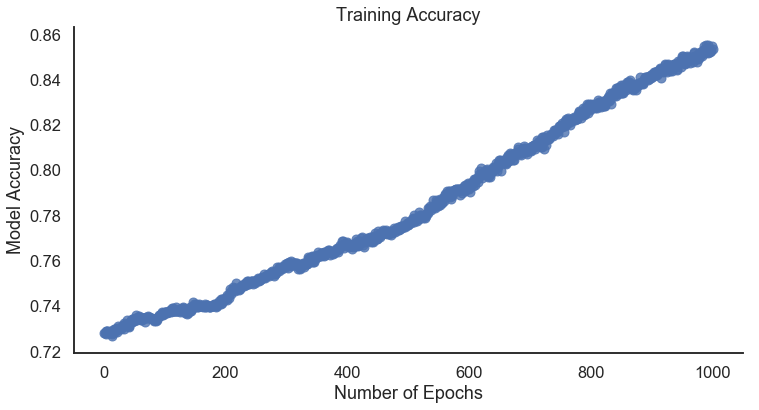

In [95]:
acc = history.history['acc']

plot_training_accuracy(acc, history)

In [234]:
def plot_training_and_validation_accuracy(acc, val_acc):
    '''Plot the accuracy on the training data and the validation data, across each epoch'''
    # Set figure
    sns.set(rc={'figure.figsize':(12,6)},style="white", context="talk")
    
    # Plot
    epochs = range(1, len(acc) + 1)
        # Dataframe for the regplot
    df = pd.DataFrame({'acc': history.history['acc'], 'val_acc': history.history['val_acc'], 'epochs': range(1, len(epochs) + 1)})
        # Plot Training Accuracy
    ax = sns.regplot(x='epochs', y='acc', data=df, color='blue', label='Training')
        # Plot Validation Accuracy on seperate y axis
    ax2 = plt.twinx()
    sns.regplot(x='epochs', y='val_acc', data=df, ax=ax2, color='green', label='Validation')
    
    # Title and Axis
    ax.set_title('Training & Validation Accuracy', fontsize='large')
    ax.set_xlabel('Number of Epochs')
    ax.set_ylabel('Training Accuracy')
    ax2.set_ylabel('Validation Accuracy')
    ax.legend()
    ax.get_legend()
    sns.despine(right=False)
#     plt.legend()
    
    max_acc = max(acc)
    min_acc = min(acc)
    acc_increase = max_acc - min_acc
    acc_increase_pct = round((acc_increase / min_acc) * 100,2)
    print('We have increased the accuracy by {}% by training the model through {} epochs'.format(acc_increase_pct, len(acc)))

We have increased the accuracy by 5.5% by training the model through 300 epochs


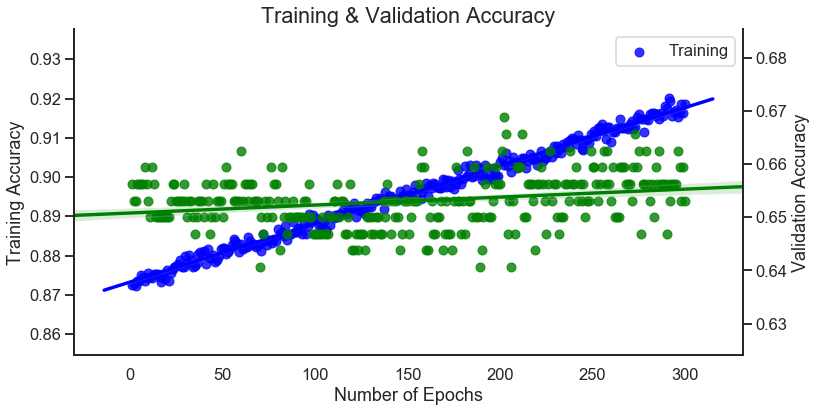

In [235]:
acc = history.history['acc']
val_acc = history.history['val_acc']

plot_training_and_validation_accuracy(acc, val_acc)

In [154]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    # Add Normalization Option
    if normalize:
        cm = cm.astype('float') / cm.sum()
        print("Normalized confusion matrix\n")
    else:
        print('Confusion matrix, without normalization\n')
#     print(cm)

    # Plot
    plt.imshow(cm, interpolation='nearest', cmap=cmap)

    # Make Pretty
    plt.title('{}\n'.format(title))
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#     plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

    fmt = '.2f' if normalize else 'd'
    threshold = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > threshold else "black")

# Data Modeling - [Your Project Name Here]

## Local Code Imports - Do not delete

In [11]:
# DO NOT REMOVE THESE
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
# DO NOT REMOVE This
%reload_ext autoreload

In [13]:
## DO NOT REMOVE
## import local src module -
## src in this project will contain all your local code
## clean_data.py, model.py, visualize.py, custom.py
from src import make_data as mk
from src import visualize as viz
from src import model as mdl
from src import pandas_operators as po

def test_src():
    mk.test_make_data()
    viz.test_viz()
    mdl.test_model()
    po.test_pandas()
    
    return 1

In [14]:
test_src()

In make_data
In Visualize
In Model
In pandas ops


1

## Code Imports

In [236]:
# For Dataframes and arrays
import numpy as np
import pandas as pd
# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Train:Test split
from sklearn.model_selection import train_test_split

# Scaling
from sklearn.preprocessing import StandardScaler

# Modelling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Random Forest

# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Neural Network
import tensorflow as tf
import keras
from keras.layers import Dense, Dropout, Activation, LeakyReLU
from keras.models import Sequential
from keras.optimizers import SGD

# Confusion Matrix
from sklearn.metrics import confusion_matrix
import itertools

# Warnings
# import warnings
# warnings.filterwarnings("ignore")

# Set random seeds
np.random.seed(123)
tf.set_random_seed(123)

# Project Overview

### Try out different models, as no model is always best
For this project we are classifying.  There are many choices of classification algorithm, each with its own strengths and weaknesses.  There is no single classifier that always works best across all scenarios so we will compare a handful of different learning algorithms to select the best model for our particular problem.  

We have decided not to use the perceptron algorithm because our data set is not perfectly linearly separable, and so the algorithm will never converge.  

### Why use KNN
KNN is a instance-based learning type of nonparamteric model.  It memorizes the training dataset and adapts immediately as we collect new training data.  

The downside of KNN is that the computational complexity for classifying new samples grows linearly with the number of samples in the training dataset.  i.e. with every fight that occurs, and updates the model, the model becomes slower and slower to run.  Our dataset is relatively very small so we are able to use this model

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)

Below we represent what KNN is doing, using the age of fighters and the win percentage leading up to the fight.  

In [ ]:
# Plot the division of above
X_age_winpct = data['age', 'win_pct']  # choose 2 x columns to show

plot_decision_regions(X_age_winpct, y_combined, classifier=knn, test_idx=range(105, 150))
# Change the test_idx to whatever subset you want to show

plt.xlabel('Age of Fighter (years)')
plt.ylabel('Win Percentage of fighter before the fight')
plt.legend(loc='upper left')
plt.tight_layout()

Choosing the right number of neighbors (k) is critical to avoid over and underfitting our model.  
We are using a Minkowski distance, which requires our distances to be standardized.  
We do not have to regularize our data but we should use feature selection and dimensionality reduction techniques to avoid the "curse of dimensionality" (which would cause our model to overfit)

### Using OvR Logistic Regression for multi-class classification
Logistic regression models only really work for binary classification tasks, limiting us to only predicting win or loss for a fighter in a fight.  There is however one-vs-rest (also known as one-vs-all) logistic regression (OvR) which supports multi-class classification.  Scikit-learn enables us to use OvR logistic regression so we can essentially predict a win, loss or draw (3 classes) for each fighter within a fight.

In [3]:
# Initiate the Logistic Regression Model
lr = LogisticRegression(C=100.0, random_state=1)
    # We set the C argument as 100 here.  a lower value will cause an increase in the regularization strength

# Fit the Logistic Regression Model    
lr.fit(X_train_std, y_train)

# Show the predicted class for each observation
lr.predict(X_test_std[:3, :])

NameError: name 'LogisticRegression' is not defined

### Regularization to help with overfitting and underfitting our model
Overfitting is one issue we face when using machine learning models.  This is where our model performs very well with the training data that we provide, but is unable to perform well on the test data.  Overfitting can be caused by a number of factors including having too many parameters.  This would then lead to a model that is too complex for the underlying data.  
There exists a trade off between overfitting and underfitting our model.  If a model is overfitting, the model is said to have high variance, and if the model is underfitting it is said to have high bias.  This bias-variance tradeoff can be dealt with by regularization.  Regularization will reduce the complexity of the model by accounting for high correlation between features (collinearity) and filtering out noise from our data. 

Regularization works by penalizing any extreme weights that we have.  One of the most common methods of regularization is L2 regularization (also known as Ridge Regression).  With the code example above, the "C" argument allows us to regularize the weights.

### Backpropogation
A benefit of using logitic regression is that the resulting logistic cost function is convex (U-shaped).  This makes it very easy to find the global cost minimum.  When we incorporate a logistic activation function into a multi-layer neural network however this U shape becomes more uneven, resulting in several local minima.  These local minima can "trap" our optimization algorithm, i.e. prevent our model from reaching the global minimum.  To help improve our model we can take advantage of backpropagation.  This will help us to reach a more satisfactory local minimum that yields powerful enough results (high accuracy in the case of this project).    


# Data Modeling

In [16]:
# Show the contents of the processed data folder
!ls ../data/processed/

bouts_cleaned        fighter_home_country
combined             fighters_cleaned


In [17]:
data = pd.read_csv('../data/processed/combined')

In [18]:
data.head()

,fighter1,fighter2,winner_is_fighter1,title_fight,method_DEC,method_DQ,method_KO/TKO,method_SUB,fighter1_win,fighter1_lose,...,fighter2_slpm,fighter2_str_acc,fighter2_sapm,fighter2_str_def,fighter2_td_avg,fighter2_td_acc,fighter2_td_def,fighter2_sub_avg,fighter1_age_at_fight,fighter2_age_at_fight
0,Neil Magny,Santiago Ponzinibbio,0,0,0,0,1,0,21,8,...,4.27,39,4.02,64,0.54,44,60,0.0,31.0,32.0
1,Ricardo Lamas,Darren Elkins,1,0,0,0,1,0,19,7,...,3.36,37,2.83,53,2.68,35,57,1.3,36.0,34.0
2,Khalil Rountree Jr.,Johnny Walker,0,0,0,0,1,0,8,2,...,5.37,70,3.36,25,0.89,100,100,2.6,28.0,26.0
3,Cezar Ferreira,Ian Heinisch,0,0,1,0,0,0,14,7,...,3.49,58,1.67,52,0.81,14,50,1.6,33.0,30.0
4,Marlon Vera,Guido Cannetti,1,0,0,0,0,1,12,5,...,2.80,52,1.95,51,2.80,50,75,0.3,25.0,38.0


## Train:Test Split

In [19]:
X = data.drop(['fighter1', 'fighter2', 'winner_is_fighter1'],axis=1)
y = data['winner_is_fighter1']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
#
print('X_Train: \n\tRows: {} \tColumns: {} \t{}% of data'.format(X_train.shape[0], X_train.shape[1], len(X_train)/len(X)*100))
print('X_Test: \n\tRows: {} \tColumns: {} \t{}% of data'.format(X_test.shape[0], X_test.shape[1], len(X_test)/len(X)*100))

X_Train: 
	Rows: 3199 	Columns: 45 	70.0% of data
X_Test: 
	Rows: 1371 	Columns: 45 	30.0% of data


- Test_size of 0.3, i.e. 30% of the data has been held out, and we will use 70% of the data to train our model
- Set the random_state so that our results are reproducable
- Stratify so that we maintain the proportion of class labels, i.e. the same proportion of red wins and blue wins


### Scaling

Many of the machine learning and optimization algorithms that we will be using require feature scaling in order to optimize performance.  We will standardize the features using StandardScaler from scikit-learn's preprocessing module.

In [21]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)

/anaconda3/envs/ml-ufc-env/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/envs/ml-ufc-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


We will use the same scaling parameters to standardize the test set, so that the values in the training and test dataset are comparable to each other.

In [22]:
X_test_std = sc.transform(X_test)

/anaconda3/envs/ml-ufc-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


## Random Forest

In [242]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [254]:
def plot_feature_importances(model):
    '''plots the importance of each feature.  Useful for something like KNN so you can tell which features are useful '''
    n_features = X_train.shape[1]
    plt.figure(figsize=(18,16))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns.values)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

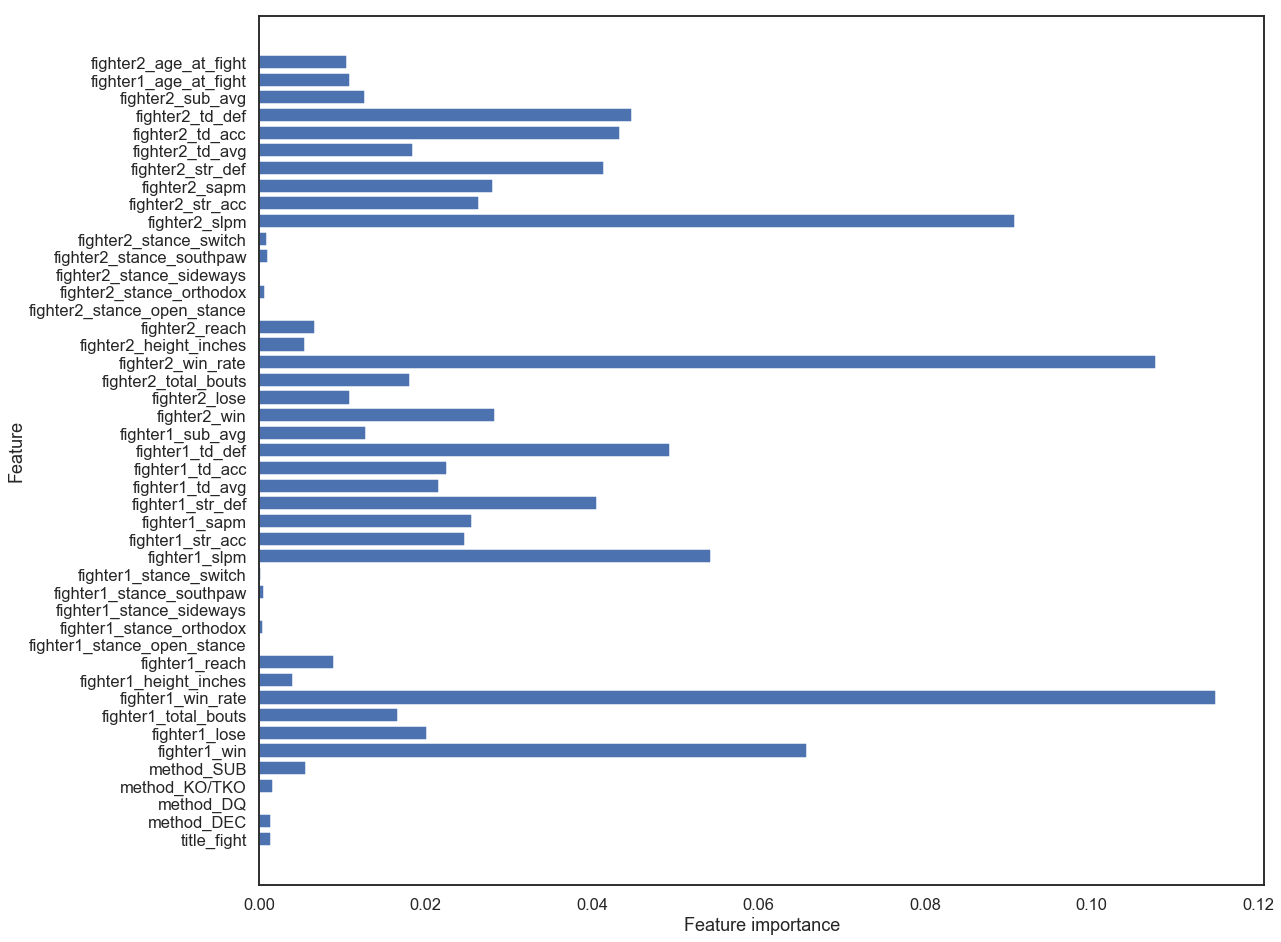

In [260]:
model_rf = RandomForestClassifier(n_estimators=100, max_depth= 5)
model_rf.fit(X_train, y_train)
model_rf.score(X_train, y_train) # Accuracy of training data
model_rf.score(X_test, y_test) # Accuracy of test data
plot_feature_importances(model_rf) # plot using function above

In [247]:
# Fine Tune the model
forest_2 = RandomForestClassifier(n_estimators = 10, max_features= 2, max_depth= 2)
forest_2.fit(X_train, y_train)
forest_2.score(X_train, y_train) # Accuracy of training data
forest_2.score(X_test, y_test)  # Accuracy of test data

0.6425966447848286

In [248]:
# Use GridsearchCV to find the best Number
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [30, 100, 300], 'min_samples_split': [2, 4, 6], 'min_samples_leaf': [2, 4, 6]}
gs = GridSearchCV(forest, param_grid, cv=5)
gs.fit(X_train, y_train)
print('Mean accuracy on the given test data and labels:', gs.score(X_test, y_test))
print('The best parameters are:', gs.best_params_)

Mean accuracy on the given test data and labels: 0.7097009482129832
The best parameters are: {'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}


## Logistic Regression

In [239]:
logreg = LogisticRegression(fit_intercept = False, C = 1e12)
model_log = logreg.fit(X_train_std, y_train)
model_log
    # Predict
y_hat_train = logreg.predict(X_train_std)
y_hat_test = logreg.predict(X_test)

    # Classifier correctness on training data
residuals = np.abs(y_train - y_hat_train)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))
correct = pd.Series(residuals).value_counts(normalize=True)[0]
print('\nOur model is {}% accurate for our training data'.format(round(correct*100,2)))
        # Classifier correctness on testing data
residuals = np.abs(y_test - y_hat_test)
print(pd.Series(residuals).value_counts(),'\n')
print(pd.Series(residuals).value_counts(normalize=True))
correct = pd.Series(residuals).value_counts(normalize=True)[0]
print('\nOur model is {}% accurate for our test data'.format(round(correct*100,2)))

0    2288
1     911
Name: winner_is_fighter1, dtype: int64
0    0.715224
1    0.284776
Name: winner_is_fighter1, dtype: float64

Our model is 71.52% accurate for our training data
0    813
1    558
Name: winner_is_fighter1, dtype: int64 

0    0.592998
1    0.407002
Name: winner_is_fighter1, dtype: float64

Our model is 59.3% accurate for our test data


In [241]:
import statsmodels.api as sm

logit_model = sm.Logit(y,X)
result = logit_model.fit()
    # See results of 2nd model
model1_summary = result.summary()
model1_summary
    # Drop rubbish pvalues
alpha = 0.05
variables_to_keep = []
for X_variable, pvalue in list(zip(X,result.pvalues)):
    if pvalue <= alpha:
        variables_to_keep.append(X_variable)
variables_to_keep  # leaves behind the variables that have p value below the alpha
X = X.drop(columns=variables_to_keep)  # take out the variables
    # Fit the 2nd model
logit_model = sm.Logit(y, X)
result = logit_model.fit()
    # see results of 2nd model
model2_summary = result.summary()
model2_summary

         Current function value: 0.553735
         Iterations: 35


LinAlgError: Singular matrix

## Implementing Neural Network with tanh

In [23]:
model_tanh = Sequential()

# Input Layer
model_tanh.add(Dense(64, input_dim=X_train_std.shape[1], activation = 'tanh'))

# Hidden Layer 1
model_tanh.add(Dense(32, input_dim = 64, activation = 'tanh'))

# Hidden Layer 2
model_tanh.add(Dense(units = 1, input_dim = 32, activation = 'sigmoid'))

# Output Layer
sgd_optimizer = SGD(lr=0.01, decay=1e-7, momentum=0.9) #learn rate, weight decay constant, momentum learning

There is a tradeoff when we are finding an appropriate learning rate.  
- Too large and the alorithm may overshoot the global cost minimum.  
- Too small and the algorithm requires far more epochs until convergence, which results in unecessary computation

Why we use a sigmoid function
- Our goal is to predict the probability that a certain sample belongs to a particular class, given its features.  In other words the probability that a certain matchup of two fighters will result in a win for fighter 1.  
- For this reason, we will use the logistic sigmoid function (abbreviated to sigmoid function) as our activation function.   The sigmoid function takes in any real number value and outputs a value between 0 and 1, which will represent the probability that we are after.  

In [24]:
model_tanh.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [147]:
# model_tanh.fit(X_train_std, y_train, epochs=100, batch_size=256)


1371/1371 [==============================] - 0s 5us/step


## Fitting the Model

In [144]:
history_tanh = model_tanh.fit(X_train_std, y_train, batch_size=256, epochs=300, verbose=1, validation_split=0.1)  
# verbose lets us follow optimization of cost function, 
# validation split helps monitor if model is overfitting in training
# We use batches so that we dont have to wait until everything is processed to start backpropagating.  

Train on 2879 samples, validate on 320 samples
Epoch 1/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.2304 - acc: 0.9215 - val_loss: 0.8195 - val_acc: 0.6594
Epoch 2/300
2879/2879 [==============================] - 0s 7us/step - loss: 0.2301 - acc: 0.9187 - val_loss: 0.8167 - val_acc: 0.6625
Epoch 3/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.2298 - acc: 0.9208 - val_loss: 0.8179 - val_acc: 0.6625
Epoch 4/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.2294 - acc: 0.9212 - val_loss: 0.8186 - val_acc: 0.6594
Epoch 5/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.2294 - acc: 0.9187 - val_loss: 0.8183 - val_acc: 0.6562
Epoch 6/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.2290 - acc: 0.9198 - val_loss: 0.8227 - val_acc: 0.6562
Epoch 7/300
2879/2879 [==============================] - 0s 7us/step - loss: 0.2287 - acc: 0.9180 - val_loss: 0.8255 - val_acc: 0.6562
Epoch 8/

Epoch 61/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.2157 - acc: 0.9257 - val_loss: 0.8516 - val_acc: 0.6562
Epoch 62/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.2148 - acc: 0.9284 - val_loss: 0.8521 - val_acc: 0.6500
Epoch 63/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.2155 - acc: 0.9260 - val_loss: 0.8517 - val_acc: 0.6562
Epoch 64/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.2146 - acc: 0.9281 - val_loss: 0.8553 - val_acc: 0.6531
Epoch 65/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.2145 - acc: 0.9291 - val_loss: 0.8573 - val_acc: 0.6469
Epoch 66/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.2141 - acc: 0.9288 - val_loss: 0.8557 - val_acc: 0.6594
Epoch 67/300
2879/2879 [==============================] - 0s 7us/step - loss: 0.2138 - acc: 0.9264 - val_loss: 0.8512 - val_acc: 0.6531
Epoch 68/300
2879/2879 [========================

2879/2879 [==============================] - 0s 6us/step - loss: 0.2007 - acc: 0.9316 - val_loss: 0.8865 - val_acc: 0.6469
Epoch 122/300
2879/2879 [==============================] - 0s 7us/step - loss: 0.2003 - acc: 0.9354 - val_loss: 0.8816 - val_acc: 0.6438
Epoch 123/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.1999 - acc: 0.9347 - val_loss: 0.8835 - val_acc: 0.6469
Epoch 124/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.2004 - acc: 0.9350 - val_loss: 0.8859 - val_acc: 0.6531
Epoch 125/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.1999 - acc: 0.9337 - val_loss: 0.8855 - val_acc: 0.6500
Epoch 126/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.1998 - acc: 0.9357 - val_loss: 0.8917 - val_acc: 0.6406
Epoch 127/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.1991 - acc: 0.9354 - val_loss: 0.8924 - val_acc: 0.6406
Epoch 128/300
2879/2879 [==============================

Epoch 181/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.1865 - acc: 0.9441 - val_loss: 0.9186 - val_acc: 0.6500
Epoch 182/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.1865 - acc: 0.9451 - val_loss: 0.9158 - val_acc: 0.6438
Epoch 183/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.1861 - acc: 0.9444 - val_loss: 0.9180 - val_acc: 0.6375
Epoch 184/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.1860 - acc: 0.9427 - val_loss: 0.9206 - val_acc: 0.6438
Epoch 185/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.1856 - acc: 0.9441 - val_loss: 0.9241 - val_acc: 0.6406
Epoch 186/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.1854 - acc: 0.9437 - val_loss: 0.9215 - val_acc: 0.6406
Epoch 187/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.1856 - acc: 0.9434 - val_loss: 0.9234 - val_acc: 0.6562
Epoch 188/300
2879/2879 [================

Epoch 241/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.1733 - acc: 0.9503 - val_loss: 0.9491 - val_acc: 0.6438
Epoch 242/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.1730 - acc: 0.9500 - val_loss: 0.9575 - val_acc: 0.6531
Epoch 243/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.1730 - acc: 0.9489 - val_loss: 0.9574 - val_acc: 0.6500
Epoch 244/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.1726 - acc: 0.9500 - val_loss: 0.9584 - val_acc: 0.6469
Epoch 245/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.1727 - acc: 0.9493 - val_loss: 0.9567 - val_acc: 0.6500
Epoch 246/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.1724 - acc: 0.9510 - val_loss: 0.9623 - val_acc: 0.6469
Epoch 247/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.1720 - acc: 0.9507 - val_loss: 0.9583 - val_acc: 0.6531
Epoch 248/300
2879/2879 [================

We have reduced the loss by 30.23% by training the model through 300 epochs


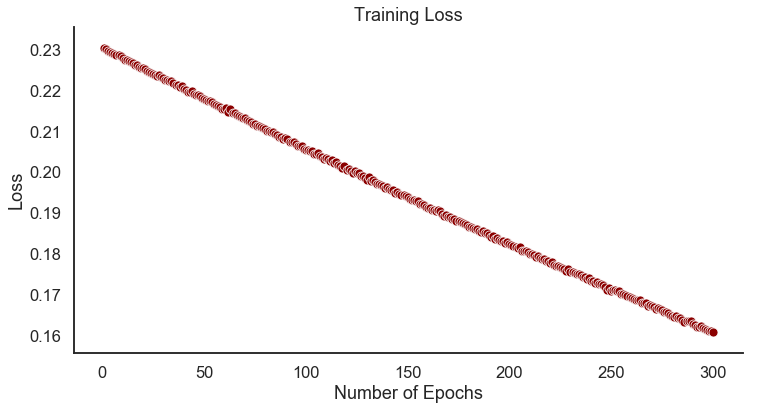

In [145]:
loss = history_tanh.history['loss']
plot_training_loss(loss)

We have increase the accuracy by 4.24% by training the model through 300 epochs


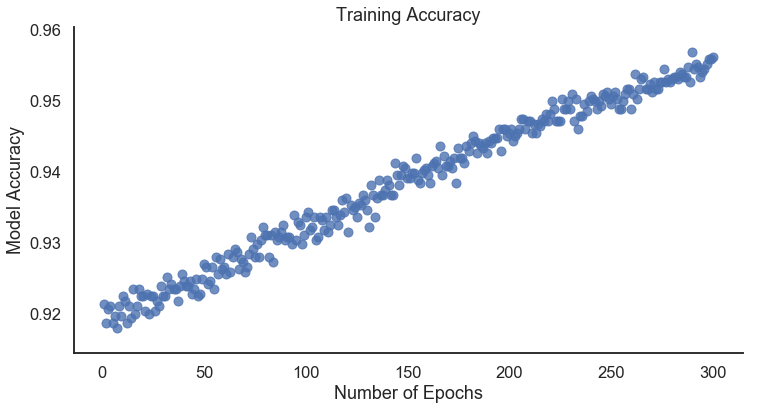

In [146]:
acc = history_tanh.history['acc']
plot_training_accuracy(acc, history_tanh)

## Confusion Matrix for Neural Network

In [158]:
cm = confusion_matrix(y_test,y_test_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()

Normalized confusion matrix



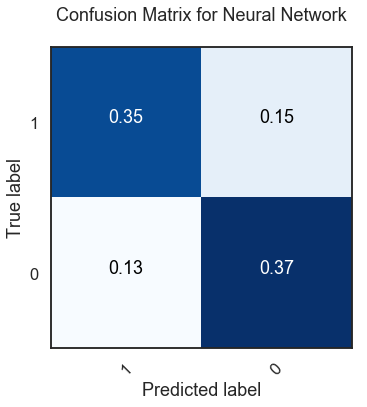

In [159]:
plot_confusion_matrix(cm=cm, classes=[1,0], normalize=True, title='Confusion Matrix for Neural Network');

In [261]:
# Code from book
from sklearn.metrics import confusion_matrix

pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('images/06_09.png', dpi=300)
plt.show()

NameError: name 'pipe_svc' is not defined

## Model Accuracy

In [ ]:
score = model_tanh.evaluate(X_test_std, y_test, batch_size=128)

### Predicting Class Labels & Accuracy

In [105]:
y_train_pred = model_tanh.predict_classes(X_train_std, verbose=0)
y_train_pred = [item for sublist in y_train_pred for item in sublist]
print('First 3 bout predictions: ', y_train_pred[:3])

# Training Accuracy
correct_preds = np.sum(y_train == y_train_pred, axis=0)
train_acc = correct_preds / y_train.shape[0]
print('Training Accuracy: {}%'.format(round(train_acc * 100, 2)))

First 3 bout predictions:  [1, 1, 0]
Training Accuracy: 89.4%


In [106]:
# Testing Accuracy
y_test_pred = model_tanh.predict_classes(X_test_std, verbose=0)
y_test_pred = [item for sublist in y_test_pred for item in sublist]
correct_preds = np.sum(y_test == y_test_pred, axis=0)
test_acc = correct_preds / y_test.shape[0]
print('Test Accuracy: {}%'.format(round(test_acc * 100), 2))

Test Accuracy: 66.0%


In [62]:
# Learn.co
model_tanh.evaluate(X_train_std, y_train)
model_tanh.evaluate(X_test_std, y_test)

1371/1371 [==============================] - 0s 12us/step


[0.6507057094556584, 0.6725018231387038]

# Relu version

In [107]:
model_relu = Sequential()
activation = 'relu'

# Input Layer
model_relu.add(Dense(64, input_dim=X_train_std.shape[1], activation = activation))

# Hidden Layer 1
model_relu.add(Dense(32, input_dim = 64, activation = activation))

# Hidden Layer 2
model_relu.add(Dense(units = 1, input_dim = 32, activation = 'sigmoid'))

# Output Layer
sgd_optimizer = SGD(lr=0.01, decay=1e-7, momentum=0.9) #learn rate, weight decay constant, momentum learning

In [108]:
model_relu.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [114]:
# Fit model
history_relu = model_relu.fit(X_train_std, y_train, batch_size=256, epochs=300, verbose=1, validation_split=0.1)  

Train on 2879 samples, validate on 320 samples
Epoch 1/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.5330 - acc: 0.7332 - val_loss: 0.5824 - val_acc: 0.6875
Epoch 2/300
2879/2879 [==============================] - 0s 7us/step - loss: 0.5325 - acc: 0.7339 - val_loss: 0.5820 - val_acc: 0.6937
Epoch 3/300
2879/2879 [==============================] - 0s 7us/step - loss: 0.5320 - acc: 0.7329 - val_loss: 0.5822 - val_acc: 0.6875
Epoch 4/300
2879/2879 [==============================] - 0s 7us/step - loss: 0.5314 - acc: 0.7343 - val_loss: 0.5817 - val_acc: 0.6906
Epoch 5/300
2879/2879 [==============================] - 0s 8us/step - loss: 0.5309 - acc: 0.7332 - val_loss: 0.5817 - val_acc: 0.6906
Epoch 6/300
2879/2879 [==============================] - 0s 7us/step - loss: 0.5303 - acc: 0.7336 - val_loss: 0.5816 - val_acc: 0.6937
Epoch 7/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.5298 - acc: 0.7364 - val_loss: 0.5815 - val_acc: 0.6906
Epoch 8/

Epoch 61/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.5066 - acc: 0.7475 - val_loss: 0.5752 - val_acc: 0.7000
Epoch 62/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.5062 - acc: 0.7496 - val_loss: 0.5752 - val_acc: 0.7000
Epoch 63/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.5058 - acc: 0.7482 - val_loss: 0.5746 - val_acc: 0.7000
Epoch 64/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.5054 - acc: 0.7496 - val_loss: 0.5743 - val_acc: 0.7000
Epoch 65/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.5050 - acc: 0.7523 - val_loss: 0.5745 - val_acc: 0.7031
Epoch 66/300
2879/2879 [==============================] - 0s 7us/step - loss: 0.5046 - acc: 0.7513 - val_loss: 0.5746 - val_acc: 0.7031
Epoch 67/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.5043 - acc: 0.7510 - val_loss: 0.5736 - val_acc: 0.7031
Epoch 68/300
2879/2879 [========================

2879/2879 [==============================] - 0s 6us/step - loss: 0.4851 - acc: 0.7617 - val_loss: 0.5710 - val_acc: 0.6969
Epoch 122/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.4848 - acc: 0.7631 - val_loss: 0.5710 - val_acc: 0.7000
Epoch 123/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.4844 - acc: 0.7624 - val_loss: 0.5715 - val_acc: 0.7000
Epoch 124/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.4841 - acc: 0.7614 - val_loss: 0.5714 - val_acc: 0.7000
Epoch 125/300
2879/2879 [==============================] - 0s 5us/step - loss: 0.4837 - acc: 0.7648 - val_loss: 0.5712 - val_acc: 0.7000
Epoch 126/300
2879/2879 [==============================] - 0s 5us/step - loss: 0.4834 - acc: 0.7624 - val_loss: 0.5709 - val_acc: 0.7031
Epoch 127/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.4830 - acc: 0.7628 - val_loss: 0.5708 - val_acc: 0.7031
Epoch 128/300
2879/2879 [==============================

Epoch 181/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.4654 - acc: 0.7721 - val_loss: 0.5706 - val_acc: 0.7094
Epoch 182/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.4651 - acc: 0.7718 - val_loss: 0.5708 - val_acc: 0.7094
Epoch 183/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.4648 - acc: 0.7735 - val_loss: 0.5710 - val_acc: 0.7094
Epoch 184/300
2879/2879 [==============================] - 0s 5us/step - loss: 0.4644 - acc: 0.7739 - val_loss: 0.5708 - val_acc: 0.7094
Epoch 185/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.4642 - acc: 0.7742 - val_loss: 0.5708 - val_acc: 0.7125
Epoch 186/300
2879/2879 [==============================] - 0s 5us/step - loss: 0.4639 - acc: 0.7746 - val_loss: 0.5709 - val_acc: 0.7094
Epoch 187/300
2879/2879 [==============================] - 0s 5us/step - loss: 0.4635 - acc: 0.7721 - val_loss: 0.5711 - val_acc: 0.7094
Epoch 188/300
2879/2879 [================

Epoch 241/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.4459 - acc: 0.7846 - val_loss: 0.5726 - val_acc: 0.7063
Epoch 242/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.4456 - acc: 0.7874 - val_loss: 0.5731 - val_acc: 0.6969
Epoch 243/300
2879/2879 [==============================] - 0s 5us/step - loss: 0.4452 - acc: 0.7857 - val_loss: 0.5732 - val_acc: 0.7031
Epoch 244/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.4449 - acc: 0.7864 - val_loss: 0.5734 - val_acc: 0.7000
Epoch 245/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.4445 - acc: 0.7867 - val_loss: 0.5723 - val_acc: 0.7094
Epoch 246/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.4442 - acc: 0.7860 - val_loss: 0.5723 - val_acc: 0.7094
Epoch 247/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.4438 - acc: 0.7864 - val_loss: 0.5721 - val_acc: 0.7063
Epoch 248/300
2879/2879 [================

We have reduced the loss by 19.95% by training the model through 300 epochs


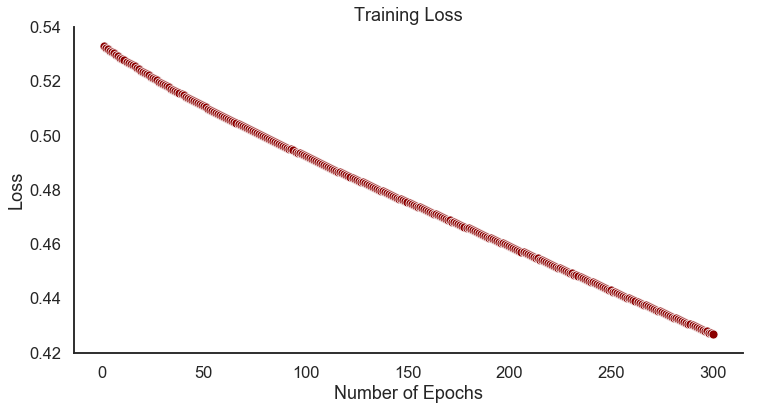

In [115]:
loss = history_relu.history['loss']
plot_training_loss(loss)

We have increase the accuracy by 8.72% by training the model through 300 epochs


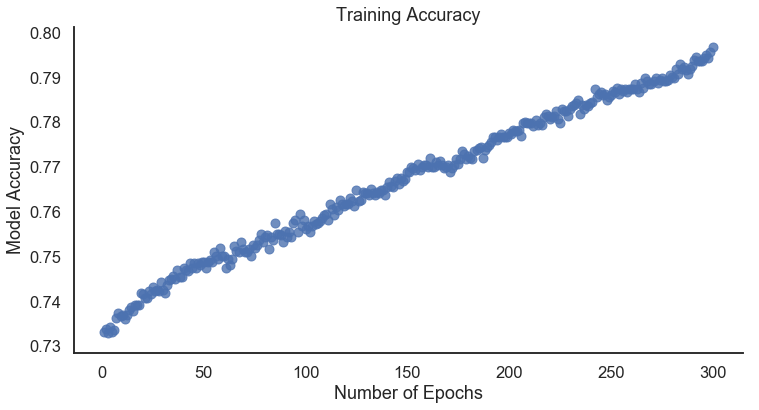

In [116]:
acc = history_relu.history['acc']
plot_training_accuracy(acc, history_relu)

In [117]:
y_train_pred = model_relu.predict_classes(X_train_std, verbose=0)
y_train_pred = [item for sublist in y_train_pred for item in sublist]
print('First 3 bout predictions: ', y_train_pred[:3])

# Training Accuracy
correct_preds = np.sum(y_train == y_train_pred, axis=0)
train_acc = correct_preds / y_train.shape[0]
print('Training Accuracy: {}%'.format(round(train_acc * 100, 2)))

First 3 bout predictions:  [1, 1, 0]
Training Accuracy: 78.74%


In [119]:
# Testing Accuracy
y_test_pred = model_relu.predict_classes(X_test_std, verbose=0)
y_test_pred = [item for sublist in y_test_pred for item in sublist]
correct_preds = np.sum(y_test == y_test_pred, axis=0)
test_acc = correct_preds / y_test.shape[0]
print('Test Accuracy: {}%'.format(round(test_acc * 100), 2))

Test Accuracy: 72.0%


# STILL TO DO
- random forest
- logistic regression
- confusion matrix (p206)
- function to plot accuracy alongside validation accuracy
    - fix legend only showing one of the lines
- md: sols to overfitting (p123)
- gridsearch to tune params (p201)
- setting weights to low values (chapter 2)


In [264]:
# Pipeline

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [266]:
pipe_svc = make_pipeline(StandardScaler(),
                         SVC(random_state=1))

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'svc__C': param_range, 'svc__kernel': ['linear']},
              {'svc__C': param_range, 'svc__gamma': param_range, 'svc__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=10,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

KeyboardInterrupt: 

Fine tuning our model via GridSearch
- We can use grid search to tune our model's hyperparameters.  
    - e.g. Here we change the depth parameter of a decision tree and later we will change the regularization parameter in logistic regression 
- Gridsearch will improve the performance of the model by finding the optimal ciombination of hyperparameter values
- Gridsearch works by a brute-force exhaustive search.  We specify a list of possible values for different hyperparameters, and the computer will evaluate the model's optimal combination of hyperparameters.
- We use a Support Vector Machine (SVM) pipeline.  
- param_grid is a dictionary of the parameters that we'd want to tune.  
